In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [4]:
#Import the dataset
df = pd.read_csv("../input/data.csv")

In [6]:
#Lets check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
#Lets check the null value of the dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#There's an additional column 'unnamed' with no data. delete as well
df.drop('Unnamed: 32',axis=1,inplace=True)

In [10]:
#Lets check the statistical inference of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


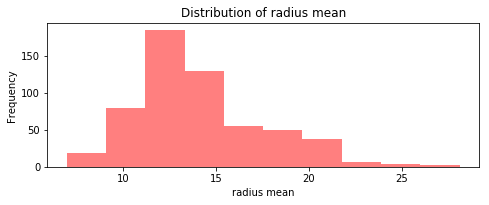

In [12]:
#Visualising the Data
#Check the Radius mean first
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df.radius_mean, 10, facecolor='red', alpha=0.5, label="radius_mean")
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
plt.xlabel('radius mean')
plt.ylabel('Frequency')
plt.title('Distribution of radius mean')
plt.show()

Text(0.5, 1.05, 'Correlation of df Features')

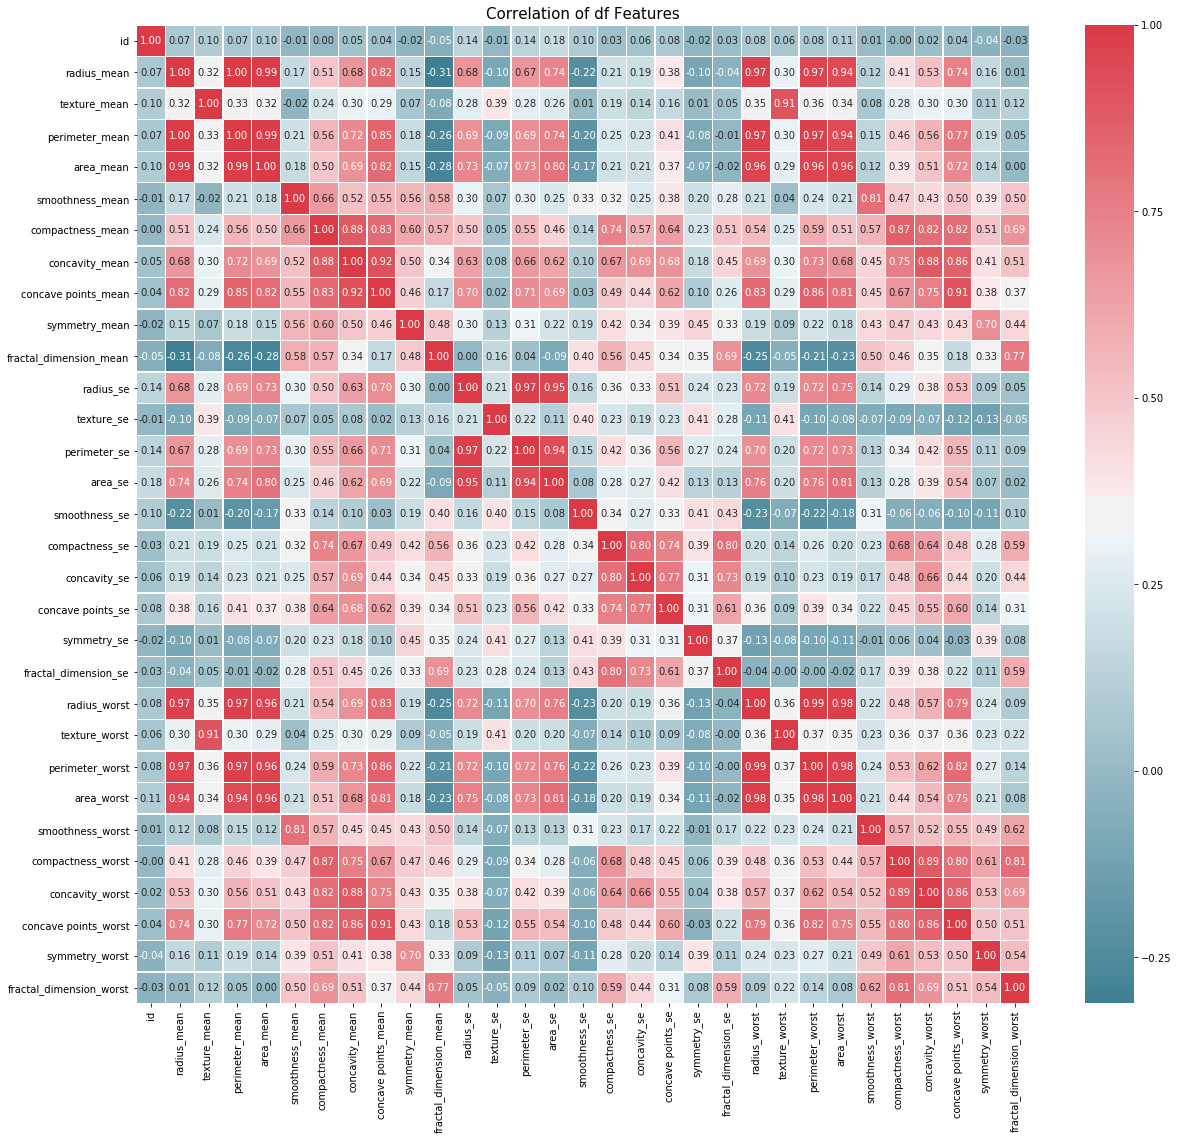

In [14]:

#Lets check the correlation and heat map
corr = df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize = (20,18))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
            cmap = colormap, linecolor='white')
plt.title('Correlation of df Features', y = 1.05, size=15)

In [16]:
#Lets create the ML model
#Lets take our matrix of features 
x = df.iloc[:, 2:32].values

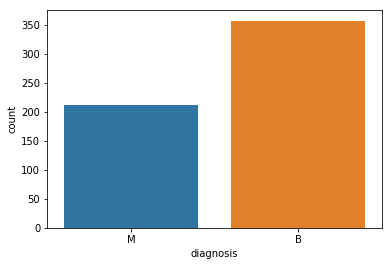

In [18]:
#Lets check the diagnosis column, which is our target variable
sns.countplot(df['diagnosis'],label="Count")
y = df.iloc[:,1].values

In [19]:
# Encoding the Categorical data (For Malignant: M =1, Benign: B = 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [20]:
#Spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
#Importing the Libraries for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
#Initilasing the ANN
classifier = Sequential()

In [24]:
# Adding the input layer and 1st hidden layers
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation ='relu', input_dim = 30))
classifier.add(Dropout(p = 0.1))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Adding 2nd hidden layers
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation ='relu'))
classifier.add(Dropout(p = 0.1))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Adding 3rd hidden layers
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation ='relu'))
classifier.add(Dropout(p = 0.1))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#Adding output layers
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation ='sigmoid'))

In [28]:
#Compile the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
#Fitting ANN to the Traning set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
455/455 [==============================] - 1s 2ms/step - loss: 0.6860 - acc: 0.6593
Epoch 2/200
455/455 [==============================] - 0s 147us/step - loss: 0.5290 - acc: 0.9297
Epoch 3/200
455/455 [==============================] - 0s 150us/step - loss: 0.1832 - acc: 0.9538
Epoch 4/200
455/455 [==============================] - 0s 145us/step - loss: 0.0993 - acc: 0.9714
Epoch 5/200
455/455 [==============================] - 0s 153us/step - loss: 0.0847 - acc: 0.9802
Epoch 6/200
455/455 [==============================] - 0s 189us/step - loss: 0.0695 - acc: 0.9824
Epoch 7/200
455/455 [==============================] - 0s 195us/step - loss: 0.0612 - acc: 0.9824
Epoch 8/200
455/455 [==============================] - 0s 196us/step - loss: 0.0684 - acc: 0.9846
Epoch 9/200
455/455 [==============================] - 0s 173us/step - loss: 0.0620 - acc: 0.9890
Epoch 10/200
455/455 [==============================] - 0s 198us/step - 

455/455 [==============================] - 0s 138us/step - loss: 0.0127 - acc: 0.9956
Epoch 82/200
455/455 [==============================] - 0s 145us/step - loss: 0.0125 - acc: 0.9934
Epoch 83/200
455/455 [==============================] - 0s 159us/step - loss: 0.0090 - acc: 0.9978
Epoch 84/200
455/455 [==============================] - 0s 144us/step - loss: 0.0073 - acc: 1.0000
Epoch 85/200
455/455 [==============================] - 0s 157us/step - loss: 0.0081 - acc: 1.0000
Epoch 86/200
455/455 [==============================] - 0s 139us/step - loss: 0.0072 - acc: 1.0000
Epoch 87/200
455/455 [==============================] - 0s 140us/step - loss: 0.0072 - acc: 0.9978
Epoch 88/200
455/455 [==============================] - 0s 137us/step - loss: 0.0093 - acc: 0.9956
Epoch 89/200
455/455 [==============================] - 0s 132us/step - loss: 0.0056 - acc: 0.9978
Epoch 90/200
455/455 [==============================] - 0s 141us/step - loss: 0.0075 - acc: 0.9978
Epoch 91/200
455/455 [=

455/455 [==============================] - 0s 139us/step - loss: 0.0011 - acc: 1.0000
Epoch 163/200
455/455 [==============================] - 0s 140us/step - loss: 6.9843e-04 - acc: 1.0000
Epoch 164/200
455/455 [==============================] - 0s 136us/step - loss: 0.0016 - acc: 1.0000
Epoch 165/200
455/455 [==============================] - 0s 135us/step - loss: 0.0012 - acc: 1.0000
Epoch 166/200
455/455 [==============================] - 0s 133us/step - loss: 7.8935e-04 - acc: 1.0000
Epoch 167/200
455/455 [==============================] - 0s 136us/step - loss: 5.5902e-04 - acc: 1.0000
Epoch 168/200
455/455 [==============================] - 0s 137us/step - loss: 6.5753e-04 - acc: 1.0000
Epoch 169/200
455/455 [==============================] - 0s 138us/step - loss: 3.1192e-04 - acc: 1.0000
Epoch 170/200
455/455 [==============================] - 0s 188us/step - loss: 9.7988e-04 - acc: 1.0000
Epoch 171/200
455/455 [==============================] - 0s 142us/step - loss: 2.9008e-04 

In [30]:
#Evaluted the Classifier
score = classifier.evaluate(x_test, y_test,verbose=1)
print(score)

114/114 [==============================] - 0s 1ms/step
[0.42176166392725956, 0.9473684220983271]


In [31]:
#Predicting the Test set result
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


In [32]:
#Making the Confusion Matrix, and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print("Accuracy = ", accuracy)


[[64  3]
 [ 3 44]]
Accuracy =  0.9473684210526315
